In [1]:
# imports
import torch
from torch import nn
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import MNIST # Training dataset
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np
from joblib import dump, load
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
#####################
# my files
# target model
from net_ import target_net
#from net_conv import target_net
# gan architectures
import gans_archs
# advgan training class
from GAN_ import advGAN

if torch.cuda.is_available():  
    dev = 'cuda:0'
else:  
    dev = 'cpu'

print('device: ', dev)

# functions
def transform_data(data_loader_obj):
    ims = []
    lls = []
    for imgs,lbls in data_loader_obj:
        for img,lbl in zip(imgs,lbls):
            ims.append(img)
            lls.append(lbl)
    ims = torch.stack(ims)
    lls = torch.stack(lls)
    return ims,lls

device:  cuda:0


In [2]:
# obtain mnist data and process
batch_size = 128
num_of_classes = 10

def get_indices(dataset,ind_array):
    indices =  []
    for i in range(len(dataset.targets)):
        for ind in ind_array:
            if dataset.targets[i] == ind:
                indices.append(i)
    return indices

dataset = MNIST('.', train=True, download=False,transform=transforms.ToTensor())
dataset_test = MNIST('.', train=False, download=False,transform=transforms.ToTensor())

idx = get_indices(dataset, np.arange(num_of_classes))
idx_test = get_indices(dataset_test, np.arange(num_of_classes))

data_loader_rftarget = DataLoader(dataset, batch_size=batch_size, sampler = SubsetRandomSampler(idx))
data_loader_target = DataLoader(dataset, batch_size=batch_size, sampler = SubsetRandomSampler(idx))
data_loader_gan = DataLoader(dataset, batch_size=batch_size, sampler = SubsetRandomSampler(idx))
data_loader_test = DataLoader(dataset_test, batch_size=1000, sampler = SubsetRandomSampler(idx_test))

classes = np.arange(num_of_classes)

In [4]:
# target model
n_estimators = 1000
ims_train,lls_train = transform_data(data_loader_target)
rf = RandomForestClassifier(n_estimators=n_estimators)
rf.fit(ims_train.reshape(len(ims_train),28*28).detach().numpy(),lls_train)
# save the model
PATH = './target_models/rf_model'+str(num_of_classes)+'classes'+'_nest'+str(n_estimators)+'.joblib'
dump(rf, PATH) 
# load the model
rf = load(PATH)

# test random forest accuracy
ims_test,lls_test = transform_data(data_loader_test)
print('accuracy: ', accuracy_score(rf.predict(ims_test.reshape(len(ims_test),28*28).detach().numpy()),lls_test))

accuracy:  0.9722


In [5]:
# import gen/disc
gen = gans_archs.Generator1()#include_noise=True,device=dev)
disc = gans_archs.Discriminator1()

# arguments for GAN training 
#target_net, gen, disc,
tar_criterion=nn.CrossEntropyLoss()
criterion=nn.BCEWithLogitsLoss()
n_epochs=200
batch_size=128
lr=0.00001
display_step=500
gen_arch='cov'
###############################
gen_arch_num=1
disc_coeff=8.
hinge_coeff=.25
adv_coeff=3.
c=0.2
gen_path_extra='rftar_proba_genarch_'+str(gen_arch_num)
shape=(1,28,28)
num_of_classes=num_of_classes
################################

# initiate advgan
advgan = advGAN(rf.predict_proba,gen,disc,tar_criterion=tar_criterion,
                criterion=criterion,n_epochs=n_epochs,
                batch_size=batch_size,num_of_classes=num_of_classes,
                lr=lr,disc_coeff=disc_coeff,hinge_coeff=hinge_coeff,
                adv_coeff=adv_coeff,c=c,gen_path_extra=gen_path_extra,
                device=dev,display_step=display_step,shape=shape,gen_arch=gen_arch)

path:  ./advgan_models/rftar_proba_genarch_1_device_cuda:0_10classes_8p0disc_0p25hinge_0p2c_3p0adv.pt


epoch:  1
Step 500: Generator loss: 10.939506482770883, discriminator loss: 3.1002800376415265


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.75 | target model % correct: 1.0 | avg. frobenius norm: 4.542134761810303
gen loss:  10.504008414546021  | disc loss:  1.6819894313812256


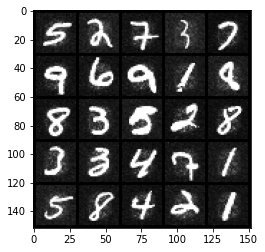

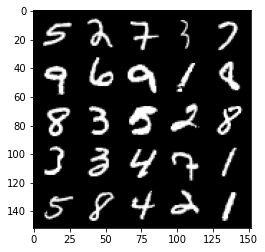

epoch:  2
Step 1000: Generator loss: 9.565370081868116, discriminator loss: 2.148905832529069


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.7109375 | target model % correct: 1.0 | avg. frobenius norm: 1.4656598567962646
gen loss:  8.792314744384493  | disc loss:  2.625371217727661


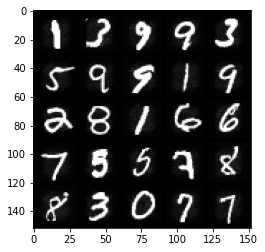

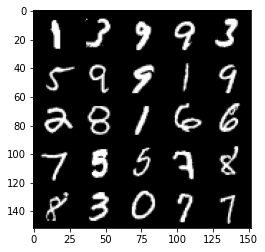

epoch:  3
Step 1500: Generator loss: 8.463671646921044, discriminator loss: 3.3050786380767816


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.5390625 | target model % correct: 1.0 | avg. frobenius norm: 0.5104295015335083
gen loss:  8.3185006389546  | disc loss:  3.9838438034057617


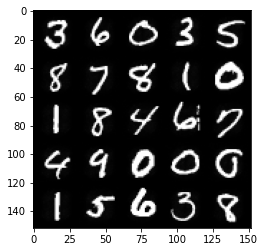

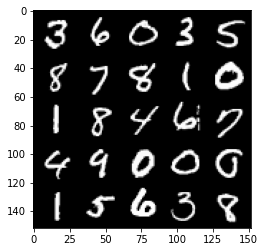

epoch:  4
Step 2000: Generator loss: 8.06143783327306, discriminator loss: 4.3165488119125355


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.421875 | target model % correct: 1.0 | avg. frobenius norm: 0.24730759859085083
gen loss:  7.961349309644141  | disc loss:  4.835598945617676


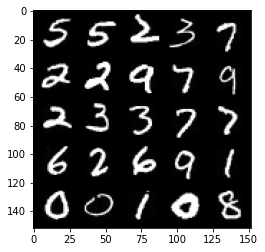

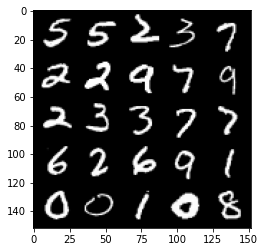

epoch:  5
Step 2500: Generator loss: 7.907933536414161, discriminator loss: 4.875256089210517


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.328125 | target model % correct: 1.0 | avg. frobenius norm: 0.17422688007354736
gen loss:  7.780076025476042  | disc loss:  4.994236946105957


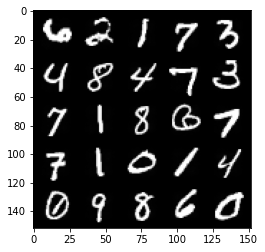

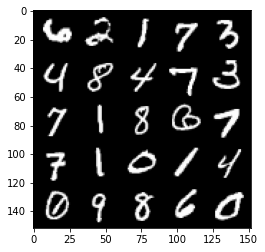

epoch:  6
Step 3000: Generator loss: 7.853256264288984, discriminator loss: 5.145447554588319


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.2265625 | target model % correct: 1.0 | avg. frobenius norm: 0.15301842987537384
gen loss:  7.784690553643928  | disc loss:  5.153402805328369


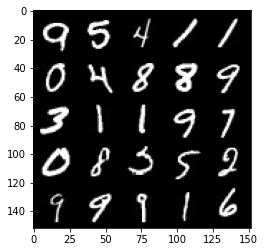

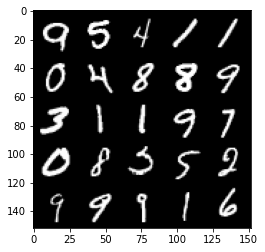

epoch:  7
Step 3500: Generator loss: 7.832090637464329, discriminator loss: 5.2897398843765275


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.1484375 | target model % correct: 1.0 | avg. frobenius norm: 0.14948810636997223
gen loss:  7.826031712963008  | disc loss:  5.236515045166016


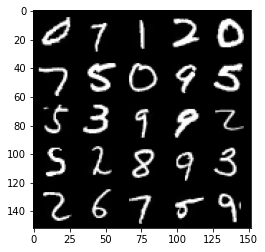

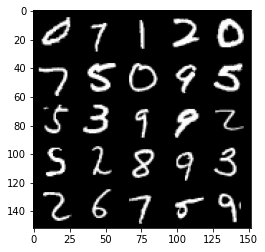

epoch:  8
Step 4000: Generator loss: 7.831228173485005, discriminator loss: 5.380423732757571


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.0703125 | target model % correct: 1.0 | avg. frobenius norm: 0.13488811254501343
gen loss:  7.84895200051296  | disc loss:  5.400318145751953


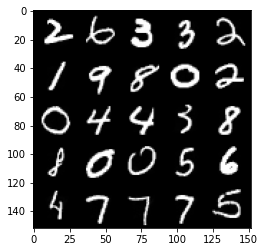

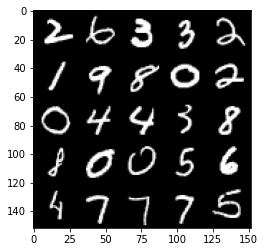

epoch:  9
Step 4500: Generator loss: 7.833525156284534, discriminator loss: 5.430216754913331


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.0390625 | target model % correct: 1.0 | avg. frobenius norm: 0.13138112425804138
gen loss:  7.886615632638766  | disc loss:  5.445380210876465


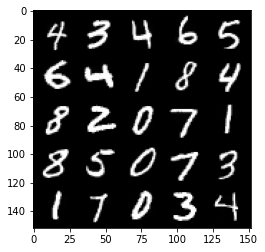

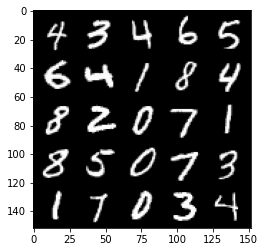

epoch:  10
Step 5000: Generator loss: 7.84209725691776, discriminator loss: 5.470420072555538


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.0390625 | target model % correct: 1.0 | avg. frobenius norm: 0.12778855860233307
gen loss:  7.841391851220749  | disc loss:  5.431583404541016


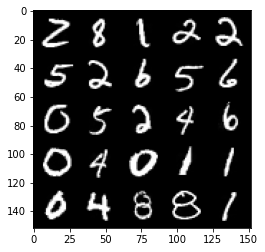

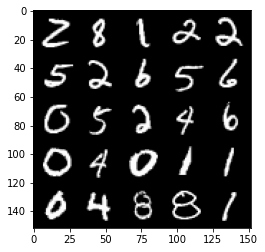

epoch:  11
Step 5500: Generator loss: 7.850403432813067, discriminator loss: 5.49590705108643


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.015625 | target model % correct: 1.0 | avg. frobenius norm: 0.11266616731882095
gen loss:  7.87138807856388  | disc loss:  5.518579483032227


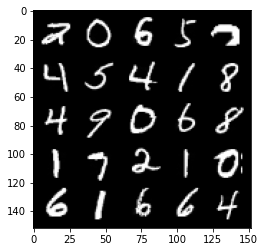

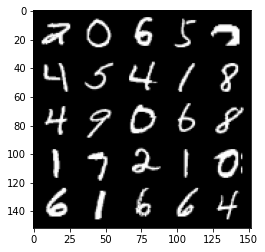

epoch:  12
Step 6000: Generator loss: 7.859020063564162, discriminator loss: 5.509556526184081


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.015625 | target model % correct: 1.0 | avg. frobenius norm: 0.1065206304192543
gen loss:  7.866800524357565  | disc loss:  5.500500679016113


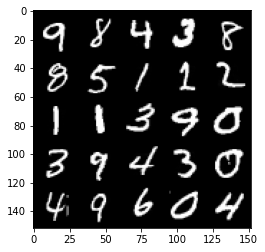

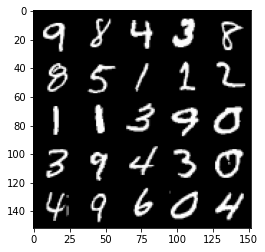

epoch:  13
Step 6500: Generator loss: 7.871740985999996, discriminator loss: 5.5203824024200525


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


% wrong: 0.0078125 | target model % correct: 1.0 | avg. frobenius norm: 0.10554183274507523
gen loss:  7.889551530011094  | disc loss:  5.499431610107422


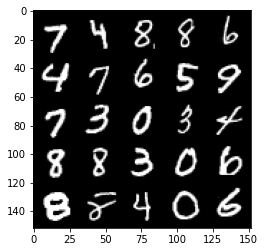

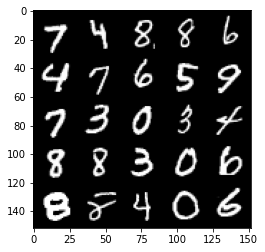

KeyboardInterrupt: 

In [6]:
%%time 
# train the gan
gen,disc = advgan.train(data_loader_gan)

In [ ]:
# notes
'''
When not concatenated with a noise vector, the robustness of the adv examples dies off. Results are illusrated 
in the form (epoch, % wrong, avg. frob. norm)
(5, 0.4, 4.4)
(25, 0.0, 0.29)
(40, 0.008, 0.15)
'''